In [1]:
## Spam detection implementation

In [2]:
# Importing libraries
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [3]:
# Step 1- Write codes to load the dataset from "spamassassin-public-corpus" folder including 
# two subfolders "ham" and "spam" related to ham and spam emails.
spam_subfolder = "./spam"
ham_subfolder = "./ham"

In [4]:
# Step 2- Load spam emails and assign label 0 to them; 
# Load ham emails and assign label 1 to them.
spam_label = 0
ham_label = 1

In [5]:
# Step 3- First, create two empty lists for email contents and labels; 
# then fill them out with emails content (ham and spams emails content) and the emails labels, respectively. 
# In this way, you have two lists with all emails contents and their labels (0 or 1).

email_list_x=[]
label_list_y=[]

# spam
for file_name in os.listdir(spam_subfolder):
    file_path = os.path.join(spam_subfolder, file_name)
    with open(file_path, 'r', encoding='latin1') as file:
        email_list_x.append(file.read())
        label_list_y.append(spam_label)

# ham
for file_name in os.listdir(ham_subfolder):
    file_path = os.path.join(ham_subfolder, file_name)
    with open(file_path, 'r', encoding='latin1') as file:
        email_list_x.append(file.read())
        label_list_y.append(ham_label)

In [6]:
# Step 4: Write codes to perform a train-test-split (80%-20%) 
# to create your train and test datasets using the two lists in step 3.
X_train, X_test, y_train, y_test = train_test_split(email_list_x, label_list_y, test_size=0.2, random_state=0)

In [7]:
# Step 5- Write codes to instantiate and train a DecisionTreeClassifier, 
# integrated with "HashingVectorizer" and "TfidfTransformer"
pipeline = make_pipeline(
    HashingVectorizer(n_features=2**20),  # Hashing vectorizer with 1024 features
    TfidfTransformer(),
    DecisionTreeClassifier(random_state=0)
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('hashingvectorizer', HashingVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [8]:
# Step 6- Evaluate your model using test dataset and show your model accuracy. 
# Also, generate the confusion matrix.

y_pred = pipeline.predict(X_test)
    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.9833333333333333
Confusion Matrix:
[[288   9]
 [  5 538]]


# The model accuracy is 98.33%

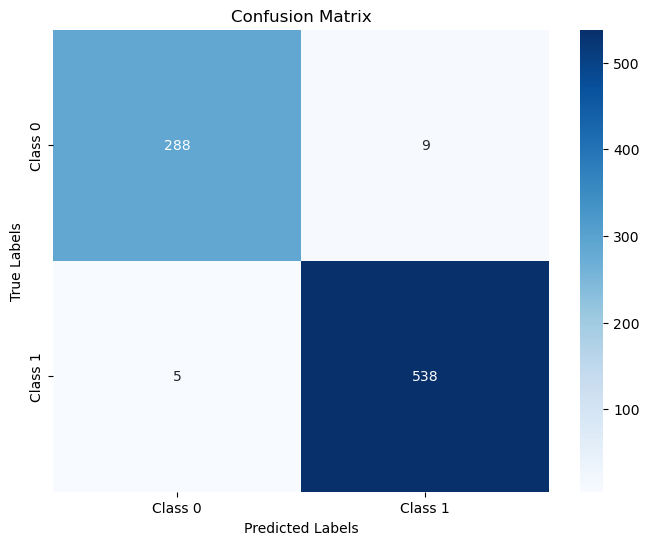

In [10]:
# visualize the confusion matrix 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix (if not already generated)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# GitHub and Medium

** GitHub Link** [**here**](https://github.com/qqiu2024/Spam-detection-implementation.git)

** Medium Link** [**here**](https://medium.com/@qqiu_58606/spam-detection-implementation-26c849f5ec5d)